In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import ast

In [82]:
metadata = pd.read_csv('all_movie_reviews.csv')
metadata

,Unnamed: 0,movie,release date,rating,genre,language,directors,duration,Box Office,Description,Audience Score,Tomatometer
0,0,chicken_run,"Jun 21, 2000",G,"['animation', 'kids and family', 'comedy', 'ad...",English,['Peter Lord'],1h 25m,NaN,"This engaging stop-motion, claymation adventur...",65.0,97.0
1,1,the_taste_of_others,"Feb 26, 2002",R,['comedy'],French (France),['Agnès Jaoui'],1h 52m,$635.3K,Castella (Jean-Pierre Bacri) is a successful b...,82.0,100.0
2,2,yi_yi,"May 8, 2001",NaN,['drama'],Edward Yang,['Edward Yang'],2h 53m,$969.1K,"Set in Taiwan, the film follows the lives of t...",91.0,97.0
3,3,memento,"Mar 1, 2017",R (Language|Drug Content|Violence),['mystery and thriller'],English,['Christopher Nolan'],1h 56m,$25.5M,Leonard (Guy Pearce) is tracking down the man ...,94.0,93.0
4,4,the_life_and_times_of_hank_greenberg,"Jul 2, 1999",PG (Mild Language|Thematic Elements),"['biography', 'documentary']",English,['Aviva Kempner'],1h 29m,$1.7M,"""The Life and Times of Hank Greenberg"" is a hu...",80.0,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2095,195,emma_2020,"Mar 6, 2020",PG (Brief Partial Nudity),"['drama', 'comedy', 'romance']",English (United Kingdom),['Autumn de'],2h 5m,$9.9M,"Beautiful, smart and wealthy, Emma Woodhouse n...",72.0,87.0
2096,196,yes_god_yes,"Jul 24, 2020",R (Sexual Content|Some Nudity),['comedy'],English,['Karen Maine'],1h 18m,NaN,A Catholic girl finds herself having tempting ...,66.0,93.0
2097,197,blood_on_her_name,"Feb 28, 2020",NaN,"['drama', 'crime', 'mystery & thriller']",Matthew Pope,['Matthew Pope'],1h 25m,NaN,A woman's panicked decision to cover up an acc...,53.0,96.0
2098,198,sylvies_love,"Dec 23, 2020",PG-13 (Smoking|Some Sexual Content),"['drama', 'music', 'romance']",English,['Eugene Ashe'],1h 54m,NaN,"In Sylvie’s Love, the jazz is smooth and the a...",77.0,93.0


In [21]:
grouped = metadata.groupby('genre').sum()/metadata.groupby('genre').count()[['Audience Score', 'Tomatometer']]

In [22]:
grouped.index

Index(['['action', 'adventure', 'history', 'drama']',
       '['action', 'adventure', 'mystery & thriller']',
       '['action', 'adventure']',
       '['action', 'comedy', 'adventure', 'fantasy']',
       '['action', 'comedy', 'adventure', 'western']',
       '['action', 'comedy', 'adventure']', '['action', 'comedy', 'sci-fi']',
       '['action', 'comedy', 'western', 'horror']', '['action', 'comedy']',
       '['action', 'crime', 'drama', 'documentary']',
       ...
       '['sci-fi', 'fantasy', 'comedy']', '['sci-fi', 'horror']',
       '['sci-fi', 'mystery & thriller']', '['sci-fi', 'romance']',
       '['sci-fi']', '['sports & fitness', 'action']',
       '['war', 'documentary']', '['western', 'action']',
       '['western', 'drama', 'adventure']', '['western']'],
      dtype='object', name='genre', length=395)

In [26]:
single_genres = list(filter(lambda x: len(ast.literal_eval(x))==1, grouped.index))
single_genres

["['action']",
 "['biography']",
 "['comedy']",
 "['documentary']",
 "['drama']",
 "['fantasy']",
 "['horror']",
 "['musical']",
 "['mystery & thriller']",
 "['mystery and thriller']",
 "['romance']",
 "['sci-fi']",
 "['western']"]

In [38]:
single_genres_df = grouped.loc[["['action']",
 "['biography']",
 "['comedy']","['documentary']",
 "['drama']",
 "['fantasy']",
 "['horror']","['musical']",
 "['mystery & thriller']",
 "['romance']",
 "['sci-fi']",
 "['western']"]]
single_genres_df

,Audience Score,Tomatometer,Unnamed: 0
genre,,,
['action'],58.000000,72.500000,NaN
['biography'],80.000000,93.000000,NaN
['comedy'],69.761905,85.828125,NaN
['documentary'],80.814085,92.969101,NaN
['drama'],77.329949,88.974684,NaN
['fantasy'],70.500000,79.500000,NaN
['horror'],67.666667,88.222222,NaN
['musical'],88.500000,98.000000,NaN
['mystery & thriller'],71.315789,86.526316,NaN


Text(0, 0.5, 'Audience Score')

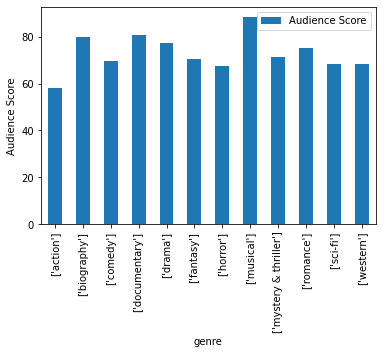

In [42]:
audience_bar = single_genres_df.plot.bar(y='Audience Score')
audience_bar.set_ylabel('Audience Score')

Text(0, 0.5, 'Critic Score')

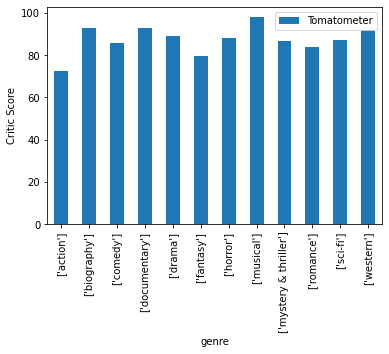

In [43]:
critic_bar = single_genres_df.plot.bar(y='Tomatometer')
critic_bar.set_ylabel('Critic Score')

<AxesSubplot:xlabel='genre'>

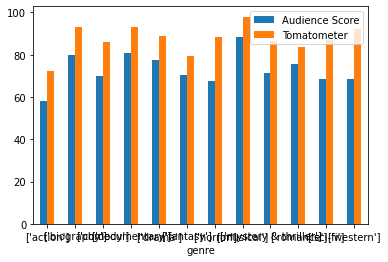

In [76]:
single_genres_df.drop(columns = 'Unnamed: 0').plot.bar(rot=0)

In [62]:
grouped_ratings = metadata.groupby('rating').sum()/metadata.groupby('rating').count()[['Audience Score', 'Tomatometer']]
single_ratings = grouped_ratings.loc[['G','PG','PG-13','R']]
single_ratings

,Audience Score,Tomatometer,Unnamed: 0
rating,,,
G,78.340000,89.180000,NaN
PG,82.833333,88.500000,NaN
PG-13,74.600000,82.700000,NaN
R,73.405405,81.810811,NaN


<AxesSubplot:xlabel='rating', ylabel='Audience Score'>

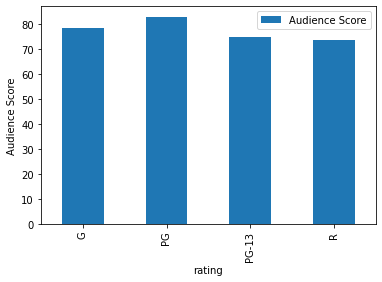

In [63]:
audience_bar_ratings = single_ratings.plot.bar(y='Audience Score')
audience_bar_ratings.set_ylabel('Audience Score')
audience_bar_ratings

Text(0, 0.5, 'Critic Score')

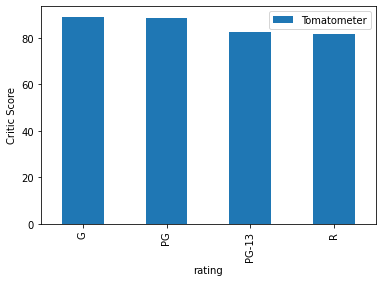

In [64]:
critic_bar_ratings = single_ratings.plot.bar(y='Tomatometer')
critic_bar_ratings.set_ylabel('Critic Score')

<AxesSubplot:xlabel='rating'>

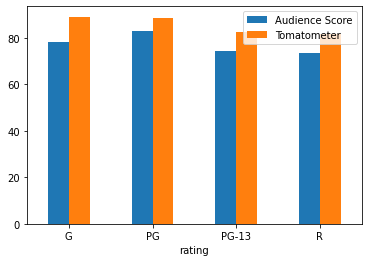

In [75]:
single_ratings.drop(columns = 'Unnamed: 0').plot.bar(rot=0)

In [112]:
metadata['year'] = metadata['release date'].str.split(',').str[-1].str.strip()
grouped_year = metadata.groupby('year').sum()/metadata.groupby('year').count()[['Audience Score', 'Tomatometer']]
valid_years = list(filter(lambda x: x[:2] == '20', grouped_year.index))
valid_grouped_year = grouped_year.loc[valid_years]

<AxesSubplot:xlabel='year'>

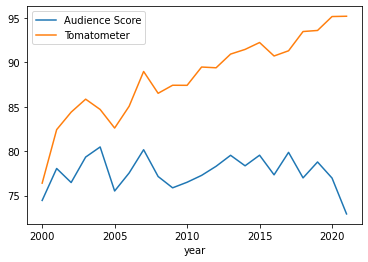

In [36]:
valid_grouped_year.drop(columns = 'Unnamed: 0').plot()

In [113]:
metadata

,Unnamed: 0,movie,release date,rating,genre,language,directors,duration,Box Office,Description,Audience Score,Tomatometer,year
0,0,chicken_run,"Jun 21, 2000",G,"['animation', 'kids and family', 'comedy', 'ad...",English,['Peter Lord'],1h 25m,NaN,"This engaging stop-motion, claymation adventur...",65.0,97.0,2000
1,1,the_taste_of_others,"Feb 26, 2002",R,['comedy'],French (France),['Agnès Jaoui'],1h 52m,$635.3K,Castella (Jean-Pierre Bacri) is a successful b...,82.0,100.0,2002
2,2,yi_yi,"May 8, 2001",NaN,['drama'],Edward Yang,['Edward Yang'],2h 53m,$969.1K,"Set in Taiwan, the film follows the lives of t...",91.0,97.0,2001
3,3,memento,"Mar 1, 2017",R (Language|Drug Content|Violence),['mystery and thriller'],English,['Christopher Nolan'],1h 56m,$25.5M,Leonard (Guy Pearce) is tracking down the man ...,94.0,93.0,2017
4,4,the_life_and_times_of_hank_greenberg,"Jul 2, 1999",PG (Mild Language|Thematic Elements),"['biography', 'documentary']",English,['Aviva Kempner'],1h 29m,$1.7M,"""The Life and Times of Hank Greenberg"" is a hu...",80.0,97.0,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,195,emma_2020,"Mar 6, 2020",PG (Brief Partial Nudity),"['drama', 'comedy', 'romance']",English (United Kingdom),['Autumn de'],2h 5m,$9.9M,"Beautiful, smart and wealthy, Emma Woodhouse n...",72.0,87.0,2020
2096,196,yes_god_yes,"Jul 24, 2020",R (Sexual Content|Some Nudity),['comedy'],English,['Karen Maine'],1h 18m,NaN,A Catholic girl finds herself having tempting ...,66.0,93.0,2020
2097,197,blood_on_her_name,"Feb 28, 2020",NaN,"['drama', 'crime', 'mystery & thriller']",Matthew Pope,['Matthew Pope'],1h 25m,NaN,A woman's panicked decision to cover up an acc...,53.0,96.0,2020
2098,198,sylvies_love,"Dec 23, 2020",PG-13 (Smoking|Some Sexual Content),"['drama', 'music', 'romance']",English,['Eugene Ashe'],1h 54m,NaN,"In Sylvie’s Love, the jazz is smooth and the a...",77.0,93.0,2020


In [69]:
def clean_box_office(amount):
    if amount[-1]=='K':
        amount = amount.strip('K').strip('$')
        return float(amount)*0.001
    if amount[-1]=='M':
        amount = amount.strip('M').strip('$')
        return float(amount)
    else:
        return 

<AxesSubplot:xlabel='Box Office'>

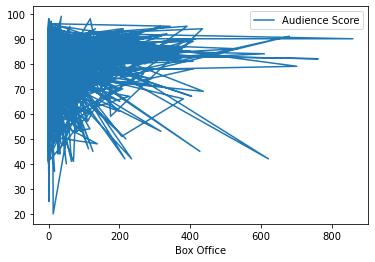

In [97]:
subset = metadata[['Box Office', 'Audience Score', 'Tomatometer']]
subset = subset.dropna()
subset['Box Office'] = subset['Box Office'].apply(clean_box_office)
subset.plot(x= 'Box Office', y= 'Audience Score')

<AxesSubplot:xlabel='Box Office'>

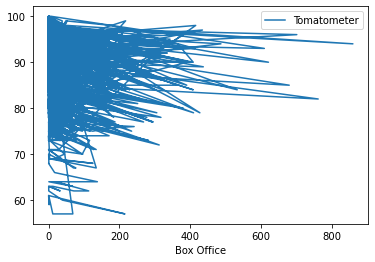

In [98]:
subset.plot(x= 'Box Office', y= 'Tomatometer')

<AxesSubplot:ylabel='Frequency'>

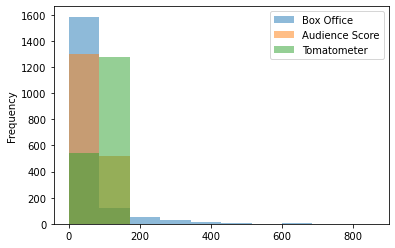

In [101]:
subset.plot.hist(alpha = 0.5)

In [102]:
import seaborn as sns

/Users/anyachandorkar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Box Office', ylabel='Density'>

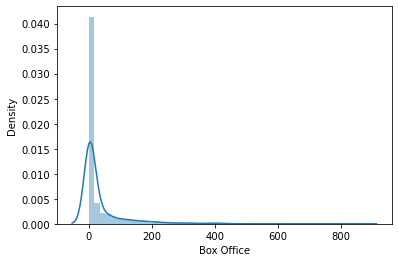

In [106]:
sns.distplot(subset['Box Office'])

/Users/anyachandorkar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/anyachandorkar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Tomatometer', ylabel='Density'>

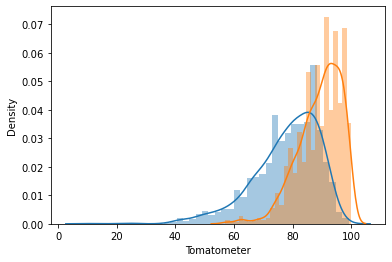

In [108]:
sns.distplot(metadata['Audience Score'])
sns.distplot(metadata['Tomatometer'])

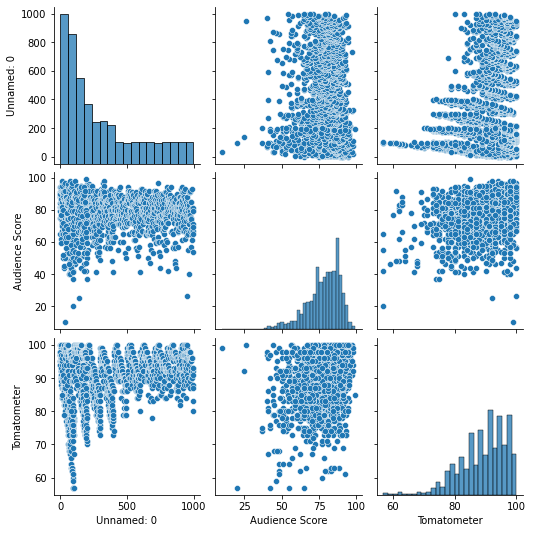

In [116]:
sns.pairplot(metadata)